<a href="https://colab.research.google.com/github/premkumarkora/detect_thyroid_-KNeighbors_Classifier/blob/main/detect_thyroid__KNeighbors_Classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
location = "/content/drive/My Drive/Colab Notebooks/data/thyroid.csv"

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, plot_roc_curve, roc_curve, roc_auc_score, confusion_matrix, f1_score


In [ ]:
df= pd.read_csv(location)
df

,Class,A percentage,TS Thyroxin,TS Triiodothyronine,Basal TSH,Max TSH
0,1,107,10.1,2.2,0.9,2.7
1,1,113,9.9,3.1,2.0,5.9
2,1,127,12.9,2.4,1.4,0.6
3,1,109,5.3,1.6,1.4,1.5
4,1,105,7.3,1.5,1.5,-0.1
...,...,...,...,...,...,...
210,3,118,6.5,1.3,1.7,11.5
211,3,139,4.2,0.7,4.3,6.3
212,3,103,5.1,1.4,1.2,5.0
213,3,97,4.7,1.1,2.1,12.6


In [ ]:
df.info() # no object data Types

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 215 entries, 0 to 214
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Class                215 non-null    int64  
 1   A percentage         215 non-null    int64  
 2   TS Thyroxin          215 non-null    float64
 3   TS Triiodothyronine  215 non-null    float64
 4   Basal TSH            215 non-null    float64
 5   Max TSH              215 non-null    float64
dtypes: float64(4), int64(2)
memory usage: 10.2 KB


In [ ]:
df.Class.unique()

array([1, 2, 3])

In [ ]:
df['Class'].value_counts()

1    150
2     35
3     30
Name: Class, dtype: int64

In [ ]:
df['A percentage'].value_counts()

In [ ]:
df['TS Thyroxin'].value_counts()

8.1     8
10.4    8
7.8     7
11.1    7
8.4     7
       ..
23.0    1
21.8    1
14.7    1
14.2    1
2.6     1
Name: TS Thyroxin, Length: 100, dtype: int64

In [ ]:
df['TS Triiodothyronine'].value_counts()

In [ ]:
 df['Basal TSH'].value_counts()

In [ ]:
df['Max TSH'].value_counts()

In [ ]:
df.isnull().sum()

Class                  0
A percentage           0
TS Thyroxin            0
TS Triiodothyronine    0
Basal TSH              0
Max TSH                0
dtype: int64

In [ ]:
df.describe()

,Class,A percentage,TS Thyroxin,TS Triiodothyronine,Basal TSH,Max TSH
count,215.000000,215.000000,215.000000,215.000000,215.000000,215.000000
mean,1.441860,109.595349,9.804651,2.050233,2.880000,4.199070
std,0.726737,13.145447,4.697362,1.419486,6.118031,8.070519
min,1.000000,65.000000,0.500000,0.200000,0.100000,-0.700000
25%,1.000000,103.000000,7.100000,1.350000,1.000000,0.550000
50%,1.000000,110.000000,9.200000,1.700000,1.300000,2.000000
75%,2.000000,117.500000,11.300000,2.200000,1.700000,4.100000
max,3.000000,144.000000,25.300000,10.000000,56.400000,56.300000


In [ ]:
#finding the ouliers
linear_vars = df.select_dtypes(include=[np.number]).columns
for i in linear_vars:
  iqr = df[i].quantile(0.75)- df[i].quantile(0.25)
  upper_threshold = df[i].quantile(0.75)+(1.5*iqr)
  lower_threshold = df[i].quantile(0.25)-(1.5*iqr)
  print(i,':', "Upper :", upper_threshold, "Lower :",lower_threshold)

Class : Upper : 3.5 Lower : 2.5
A percentage : Upper : 139.25 Lower : 124.75
TS Thyroxin : Upper : 17.6 Lower : 13.400000000000002
TS Triiodothyronine : Upper : 3.4750000000000005 Lower : 2.625
Basal TSH : Upper : 2.75 Lower : 2.05
Max TSH : Upper : 9.424999999999999 Lower : 5.874999999999999


In [ ]:
#Remove  outliers

def removeoutliers(df, listvars, z):
    from scipy import stats
    for var in listvars:
        df1 = df[np.abs(stats.zscore(df[var])) < z]
    return df1
df = removeoutliers(df, linear_vars,3)

In [ ]:
for i in linear_vars:
  iqr = df[i].quantile(0.75)- df[i].quantile(0.25)
  upper_threshold = df[i].quantile(0.75)+(1.5*iqr)
  lower_threshold = df[i].quantile(0.25)-(1.5*iqr)
  print(i,':', "Upper :", upper_threshold, "Lower :",lower_threshold)

Class : Upper : 3.5 Lower : 2.5
A percentage : Upper : 138.0 Lower : 124.0
TS Thyroxin : Upper : 17.7125 Lower : 13.4875
TS Triiodothyronine : Upper : 3.4000000000000004 Lower : 2.6000000000000005
Basal TSH : Upper : 2.8 Lower : 2.05
Max TSH : Upper : 9.0 Lower : 5.6


In [ ]:
df.info() # Five Rows have been removed using the Z value.

<class 'pandas.core.frame.DataFrame'>
Int64Index: 210 entries, 0 to 214
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Class                210 non-null    int64  
 1   A percentage         210 non-null    int64  
 2   TS Thyroxin          210 non-null    float64
 3   TS Triiodothyronine  210 non-null    float64
 4   Basal TSH            210 non-null    float64
 5   Max TSH              210 non-null    float64
dtypes: float64(4), int64(2)
memory usage: 11.5 KB


In [ ]:
df.corr() # other than Basal TSH	Max TSH, I cannot find any usefull Positive or Negative correlation

,Class,A percentage,TS Thyroxin,TS Triiodothyronine,Basal TSH,Max TSH
Class,1.000000,0.073621,-0.084172,0.108104,0.538244,0.477645
A percentage,0.073621,1.000000,-0.485224,-0.535284,0.272843,0.355092
TS Thyroxin,-0.084172,-0.485224,1.000000,0.720080,-0.405908,-0.524572
TS Triiodothyronine,0.108104,-0.535284,0.720080,1.000000,-0.235936,-0.328029
Basal TSH,0.538244,0.272843,-0.405908,-0.235936,1.000000,0.614533
Max TSH,0.477645,0.355092,-0.524572,-0.328029,0.614533,1.000000


In [ ]:
df[['Basal TSH','Max TSH','Class']].corr()

,Basal TSH,Max TSH,Class
Basal TSH,1.00,0.61,0.54
Max TSH,0.61,1.00,0.48
Class,0.54,0.48,1.00


In [ ]:
df = df.drop_duplicates()
df.info() # There is No duplicates

<class 'pandas.core.frame.DataFrame'>
Int64Index: 210 entries, 0 to 214
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Class                210 non-null    int64  
 1   A percentage         210 non-null    int64  
 2   TS Thyroxin          210 non-null    float64
 3   TS Triiodothyronine  210 non-null    float64
 4   Basal TSH            210 non-null    float64
 5   Max TSH              210 non-null    float64
dtypes: float64(4), int64(2)
memory usage: 11.5 KB


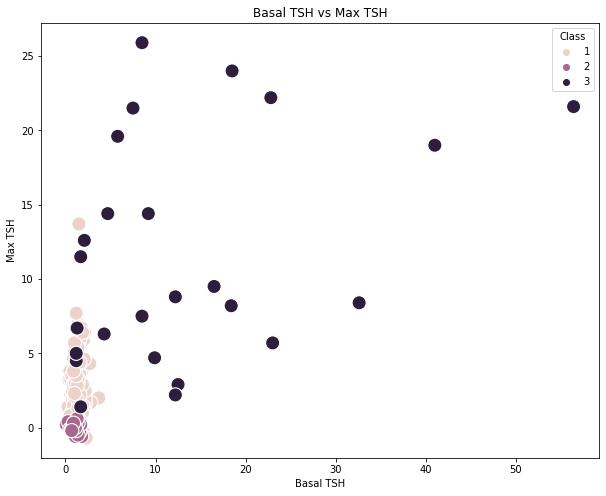

In [ ]:
# only Basal TSH and Max TSH positive Corelation only.
plt.figure(figsize=(10, 8))
sns.scatterplot(x='Basal TSH', y='Max TSH', hue='Class', data=df, s=200)
plt.title('Basal TSH vs Max TSH')
plt.xlabel('Basal TSH')
plt.ylabel('Max TSH')
ax = plt.gca()

# (1 = normal, 2 = hyper, 3 = hypo)

In [ ]:
x= df[["Basal TSH", "Max TSH"]]
y= df["Class"]
X_train,X_test,y_train,y_test = train_test_split(x,y,test_size=0.30)

In [ ]:
x

,Basal TSH,Max TSH
0,0.90,2.70
1,2.00,5.90
2,1.40,0.60
3,1.40,1.50
4,1.50,-0.10
...,...,...
210,1.70,11.50
211,4.30,6.30
212,1.20,5.00
213,2.10,12.60


In [ ]:
!pip install lazypredict

In [ ]:

import lazypredict 
from lazypredict.Supervised import LazyClassifier
clf = LazyClassifier(verbose=0,ignore_warnings=True)
models, predictions = clf.fit(X_train, X_test, y_train, y_test)
models

100%|██████████| 29/29 [00:00<00:00, 53.81it/s]


,Accuracy,Balanced Accuracy,ROC AUC,F1 Score,Time Taken
Model,,,,,
NearestCentroid,0.81,0.81,None,0.82,0.01
Perceptron,0.84,0.79,None,0.84,0.01
KNeighborsClassifier,0.86,0.78,None,0.86,0.01
BaggingClassifier,0.84,0.77,None,0.84,0.02
ExtraTreeClassifier,0.84,0.77,None,0.84,0.01
ExtraTreesClassifier,0.86,0.76,None,0.85,0.08
DecisionTreeClassifier,0.84,0.76,None,0.84,0.01
LGBMClassifier,0.84,0.74,None,0.84,0.02
AdaBoostClassifier,0.81,0.74,None,0.81,0.06


In [ ]:
Knclf = KNeighborsClassifier(n_neighbors=3)
Knclf.fit(X_train, y_train)
y_pred = Knclf.predict(X_test)

In [ ]:
print("Score : ", Knclf.score(X_test,y_test)) # accuracy
print("Confusion Matrix ")
print(confusion_matrix(y_test,y_pred))
#print("F1 Score", f1_score(y_test,y_pred))
print("logistic_regression.score: ", Knclf.score(X_test,y_test))
#plot_roc_curve(Knclf, X_test, y_test)
print("Accuracy Score :", accuracy_score(y_test,y_pred))

Score :  0.8571428571428571
Confusion Matrix 
[[40  4  0]
 [ 3 10  0]
 [ 2  0  4]]
logistic_regression.score:  0.8571428571428571
Accuracy Score : 0.8571428571428571
